## Training Model

In [1]:
# Final Code Starts Here
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import os

In [60]:
# Update these paths with the actual paths to your folders
folders = ['kishore_kumar_test', 'micheal_jackson_test', 'asha_bhosle_test', 'bhavgeet_test', 'lavani_test', 'national_anthem_test']

In [155]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def extract_row_features_from_csv(filepath, ind):
    # Load CSV file into a DataFrame
    df = pd.read_csv(filepath, header=None)
    
    # List to hold dictionaries of statistics for each row
    summary_stats = {}
    
    # Iterate over each row
    for i, row in df.iterrows():
        row_data = row.values  # Extract row as numpy array
        
        feature_name = f"MFCC_{i+1}_Mean"
        summary_stats[feature_name] = np.mean(row_data)
                
        feature_name = f"MFCC_{i+1}_Std"
        summary_stats[feature_name] = np.std(row_data)
                
        feature_name = f"MFCC_{i+1}_Min"
        summary_stats[feature_name] = np.min(row_data)
                
        feature_name = f"MFCC_{i+1}_Max"
        summary_stats[feature_name] = np.max(row_data)
                
        feature_name = f"MFCC_{i+1}_Median"
        summary_stats[feature_name] = np.median(row_data)
                
        feature_name = f"MFCC_{i+1}_Skew"
        summary_stats[feature_name] = skew(row_data)
                
        feature_name = f"MFCC_{i+1}_Kurtosis"
        summary_stats[feature_name] = kurtosis(row_data)
            
        feature_name = f"MFCC_{i+1}_25th_Percentile"
        summary_stats[feature_name] = np.percentile(row_data, 25)
                
        feature_name = f"MFCC_{i+1}_75th_Percentile"
        summary_stats[feature_name] = np.percentile(row_data, 75)
                
        feature_name = f"MFCC_{i+1}_Energy"
        summary_stats[feature_name] = np.sum(row_data ** 2)

    return pd.DataFrame(summary_stats, index=[ind])

In [62]:
# Lists to store all extracted features and labels
data = pd.DataFrame()
labels = []

def process_csv_from_folder(folders, data):
    # Loop through each folder and each CSV file within
    for folder in folders:
        label = folder.replace('_test', '')  # Use folder name as label
    
        # Loop through each file in the folder
        for filename in os.listdir(folder):
            if filename.endswith(".csv"):
                filepath = os.path.join(folder, filename)
            
                # Extract features for the current CSV file
                features = extract_row_features_from_csv(filepath, filename)

                data = pd.concat([data, features], ignore_index=True)
                # Append features and label to the data lists
                # data.append(features)
                labels.append(label)
                print(f'processed file : {filename}')
            
    # Convert data and labels into a DataFrame for further processing
    # data_df = pd.DataFrame(data)
    data['label'] = labels  # Add label column to DataFrame

    return data

data = process_csv_from_folder(folders, data)

# Display the DataFrame to verify results
data.head()

processed file : 01- Kati Patang - Ye h Jo Mohabbat Hai -MFCC.csv
processed file : 02- KATI PATANG-PYAR DIWANA HOTA HAI-MFCC.csv
processed file : 03-KUDRAT-HUMEN TUMSE PYAR KITNA-MFCC.csv
processed file : 06-MEHBOOBA-MERE NAINA SAWAN BHADON-MFCC.csv
processed file : 18-SAFAR-ZINDAGI KA SAFAR-MFCC.csv
processed file : audio (1)_mfcc.csv
processed file : audio (10)_mfcc.csv
processed file : audio (11)_mfcc.csv
processed file : audio (12)_mfcc.csv
processed file : audio (13)_mfcc.csv
processed file : audio (14)_mfcc.csv
processed file : audio (15)_mfcc.csv
processed file : audio (16)_mfcc.csv
processed file : audio (17)_mfcc.csv
processed file : audio (18)_mfcc.csv
processed file : audio (19)_mfcc.csv
processed file : audio (2)_mfcc.csv
processed file : audio (20)_mfcc.csv
processed file : audio (21)_mfcc.csv
processed file : audio (22)_mfcc.csv
processed file : audio (23)_mfcc.csv
processed file : audio (24)_mfcc.csv
processed file : audio (25)_mfcc.csv
processed file : audio (26)_mfcc.c

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Std,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,label
0,-163.675714,63.019794,-510.12640,-61.629566,-148.550580,-3.050214,13.165890,-182.812580,-127.608675,6.540761e+08,...,6.108145,-28.743973,30.113373,-6.272747,0.249264,0.704581,-10.289749,-2.067537,1.591737e+06,kishore_kumar
1,-238.778330,54.284029,-563.11395,-130.066150,-228.452785,-3.175607,15.594721,-254.316202,-208.363990,1.482856e+09,...,6.192415,-31.208870,23.351921,-6.494333,0.187749,0.550829,-10.510485,-2.479045,1.973518e+06,kishore_kumar
2,-279.811825,75.441601,-531.60535,-100.389114,-271.056595,-0.942191,1.324008,-317.419650,-227.894325,1.872890e+09,...,9.303465,-36.926460,40.364304,-4.862177,0.486926,0.618644,-10.195070,1.309195,2.279031e+06,kishore_kumar
3,-230.811105,70.051493,-589.34240,-106.854610,-216.176500,-2.533267,9.754092,-256.315043,-187.450600,1.650245e+09,...,6.794504,-35.316190,26.348516,-7.102251,0.186112,0.834270,-11.337188,-2.738301,2.700186e+06,kishore_kumar
4,-229.294356,60.428998,-548.41130,-123.512610,-215.831485,-2.439403,8.541224,-247.034955,-193.410255,1.158513e+09,...,6.612869,-35.301945,23.513912,-9.597652,0.486175,0.791015,-13.642576,-5.172983,2.610678e+06,kishore_kumar


In [63]:
# Save the DataFrame to a CSV file
data.to_csv('processed_mfcc_features.csv', index=False)

In [2]:
data = pd.read_csv('processed_mfcc_features.csv')
data['label'].unique()

array(['kishore_kumar', 'micheal_jackson', 'asha_bhosle', 'bhavgeet',
       'lavani', 'national_anthem'], dtype=object)

In [87]:
data

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Std,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,label
0,-163.675714,63.019794,-510.12640,-61.629566,-148.550580,-3.050214,13.165890,-182.812580,-127.608675,6.540761e+08,...,6.108145,-28.743973,30.113373,-6.272747,0.249264,0.704581,-10.289749,-2.067537,1.591737e+06,kishore_kumar
1,-238.778330,54.284029,-563.11395,-130.066150,-228.452785,-3.175607,15.594721,-254.316203,-208.363990,1.482856e+09,...,6.192415,-31.208870,23.351921,-6.494333,0.187749,0.550829,-10.510485,-2.479045,1.973518e+06,kishore_kumar
2,-279.811825,75.441601,-531.60535,-100.389114,-271.056595,-0.942191,1.324008,-317.419650,-227.894325,1.872890e+09,...,9.303465,-36.926460,40.364304,-4.862177,0.486926,0.618644,-10.195070,1.309195,2.279031e+06,kishore_kumar
3,-230.811105,70.051493,-589.34240,-106.854610,-216.176500,-2.533267,9.754092,-256.315043,-187.450600,1.650245e+09,...,6.794504,-35.316190,26.348516,-7.102251,0.186112,0.834270,-11.337188,-2.738301,2.700186e+06,kishore_kumar
4,-229.294356,60.428998,-548.41130,-123.512610,-215.831485,-2.439403,8.541224,-247.034955,-193.410255,1.158513e+09,...,6.612869,-35.301945,23.513912,-9.597652,0.486175,0.791015,-13.642576,-5.172983,2.610678e+06,kishore_kumar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-226.047499,87.910985,-532.18134,-74.894060,-201.199330,-1.171196,0.942635,-272.154570,-158.046130,4.480762e+08,...,6.913683,-35.941994,23.412483,-4.743902,0.003065,0.240459,-9.222791,-0.258228,5.338630e+05,national_anthem
208,-138.519295,66.562670,-561.22570,-22.236542,-126.767320,-3.759978,19.578028,-156.623870,-104.864407,1.426302e+08,...,8.670806,-27.897915,33.972560,4.197574,0.024351,0.083134,-1.574141,9.929784,5.624793e+05,national_anthem
209,-234.539660,123.040545,-564.59770,-79.524000,-195.324570,-1.061207,0.276617,-288.184500,-143.240805,5.330533e+08,...,8.706965,-36.191475,22.872894,-4.932066,-0.167720,-0.091959,-11.304470,0.529332,7.887511e+05,national_anthem
210,-355.473327,49.538955,-675.41064,-212.213930,-346.917900,-1.719975,6.678959,-373.452200,-326.473940,6.658468e+08,...,6.331650,-25.825638,20.230988,-1.005623,-0.129370,-0.086784,-5.488255,3.200681,2.149152e+05,national_anthem


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Get the mapping of labels to numbers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_mapping)

{'asha_bhosle': 0, 'bhavgeet': 1, 'kishore_kumar': 2, 'lavani': 3, 'micheal_jackson': 4, 'national_anthem': 5}


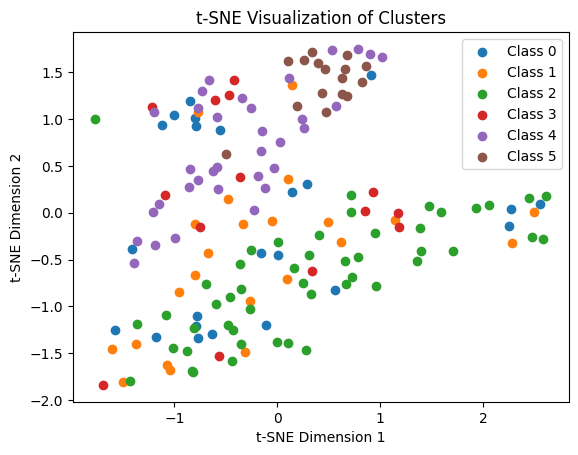

In [115]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Standardize the feature data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tsne)

plt.figure()
for label in np.unique(y_train):
    plt.scatter(X_scaled[y_train == label, 0], X_scaled[y_train == label, 1], label=f'Class {label}')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.title('t-SNE Visualization of Clusters')
plt.savefig('train_data_original_clusters.png')
plt.show()

In [146]:
# Initialize classifiers
classifiers = {
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=6),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # y_pred = clf.predict(X_train)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #accuracy = accuracy_score(y_train, y_pred)
    accuracy_scores[name] = accuracy
    
    # Print results
    print(f"Classifier: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    # print("Classification Report:\n", classification_report(y_train, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    # print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred, zero_division=0))
    print("\n" + "="*50 + "\n")

# Display all accuracy scores
print("Summary of Accuracy Scores:")
for clf_name, acc_score in accuracy_scores.items():
    print(f"{clf_name}: {acc_score:.4f}")

Classifier: Support Vector Machine
Accuracy: 0.4528301886792453
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         8
           2       0.36      0.90      0.51        10
           3       0.00      0.00      0.00         6
           4       0.54      0.88      0.67        17
           5       0.00      0.00      0.00         6

    accuracy                           0.45        53
   macro avg       0.15      0.30      0.20        53
weighted avg       0.24      0.45      0.31        53

Confusion Matrix:
 [[ 0  0  3  0  3  0]
 [ 0  0  8  0  0  0]
 [ 0  0  9  0  1  0]
 [ 0  0  3  0  3  0]
 [ 0  0  2  0 15  0]
 [ 0  0  0  0  6  0]]


Classifier: K-Nearest Neighbors
Accuracy: 0.37735849056603776
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.33      0.24         6
           1       0.25   

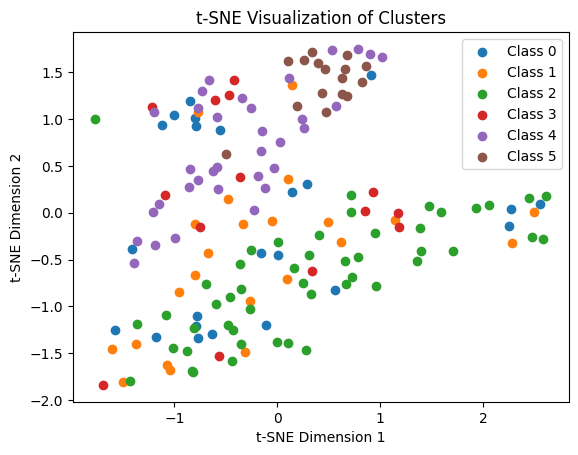

In [117]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Standardize the feature data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tsne)

plt.figure()
for label in np.unique(y_train):
    plt.scatter(X_scaled[y_pred == label, 0], X_scaled[y_pred == label, 1], label=f'Class {label}')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.title('t-SNE Visualization of Clusters')
plt.savefig('train_clusters.png')
plt.show()

In [39]:
clf

RandomForestClassifier(random_state=42)

## Implementing Model on data provided in the Problem Statement

In [156]:
folder = 'MFCC-files-v2'

In [157]:
def process_csv_from_folder_clustering(folder):
    data = pd.DataFrame()
    filenames = []
    
    # Loop through each file in the folder
    for filename in os.listdir(folder):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder, filename)
            
            # Extract features for the current CSV file
            features = extract_row_features_from_csv(filepath, filename)

            data = pd.concat([data, features], ignore_index=True)
            # Append features and label to the data lists
            # data.append(features)
            filenames.append(filename.replace(".csv", ""))
            print(f'processed file : {filename}')

    data['filename'] = filenames

    return data

In [158]:
processed_data = process_csv_from_folder_clustering(folder)

processed file : 01-MFCC.csv
processed file : 02-MFCC.csv
processed file : 03-MFCC.csv
processed file : 04-MFCC.csv
processed file : 05-MFCC.csv
processed file : 06-MFCC.csv
processed file : 07-MFCC.csv
processed file : 08-MFCC.csv
processed file : 09-MFCC.csv
processed file : 10-MFCC.csv
processed file : 100-MFCC.csv
processed file : 101-MFCC.csv
processed file : 102-MFCC.csv
processed file : 103-MFCC.csv
processed file : 104-MFCC.csv
processed file : 105-MFCC.csv
processed file : 106-MFCC.csv
processed file : 107-MFCC.csv
processed file : 108-MFCC.csv
processed file : 109-MFCC.csv
processed file : 11-MFCC.csv
processed file : 110-MFCC.csv
processed file : 111-MFCC.csv
processed file : 112-MFCC.csv
processed file : 113-MFCC.csv
processed file : 114-MFCC.csv
processed file : 115-MFCC.csv
processed file : 116-MFCC.csv
processed file : 12-MFCC.csv
processed file : 13-MFCC.csv
processed file : 14-MFCC.csv
processed file : 15-MFCC.csv
processed file : 16-MFCC.csv
processed file : 17-MFCC.c

In [137]:
processed_data.to_csv('integrated_song_features.csv', index=False)

In [139]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the integrated features CSV
df = pd.read_csv("integrated_song_features.csv")

# Drop non-numeric columns if any (e.g., "Song" column) to keep only feature columns for PCA
if 'filename' in df.columns:
    df_features = df.drop(columns=['filename'])
else:
    df_features = df

# Standardize the feature data for PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Apply PCA to reduce to 5 components
pca = PCA(n_components=6)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the 5 principal components
pca_columns = [f"PC{i+1}" for i in range(6)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Optionally add the "Song" column back to identify each row (song)
if 'filename' in df.columns:
    pca_df['filename'] = df['filename']

# Save or display the PCA DataFrame
pca_df.to_csv("pca_song_features.csv", index=False)
print("PCA-reduced data saved to 'pca_song_features.csv'")
print(pca_df.head())

PCA-reduced data saved to 'pca_song_features.csv'
         PC1        PC2       PC3       PC4       PC5       PC6 filename
0   4.224017   6.173116 -2.906155  3.683458  1.593664 -0.006192  01-MFCC
1   1.060591  10.261355 -2.612883 -1.788675 -2.202798 -3.945199  02-MFCC
2  -4.559082   5.967720  3.598224 -2.021963 -2.134679 -1.850566  03-MFCC
3 -10.715963   2.048837  1.785645 -2.453740 -3.517897  1.801733  04-MFCC
4  10.360502   0.243200  1.226061  0.284117  0.124580 -0.170422  05-MFCC


(116, 201)


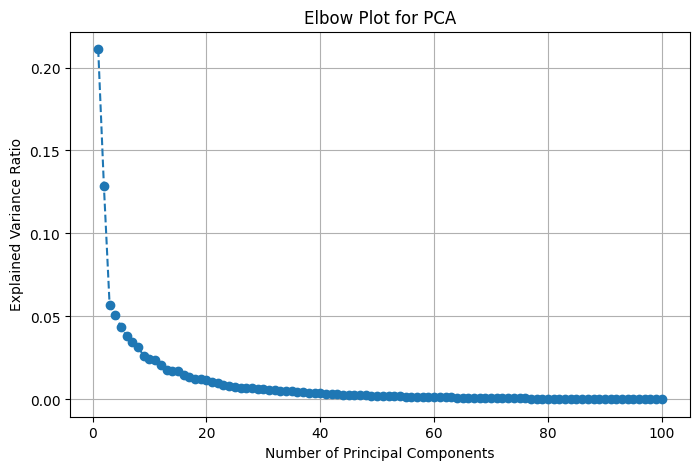

In [140]:
import matplotlib.pyplot as plt

df_scaled_1 = df_scaled
print(df_scaled.shape)
# Apply PCA with enough components to capture cumulative variance
pca_1 = PCA(n_components=100)
pca_1.fit(df_scaled_1)

# Calculate explained variance ratio for each component
explained_variance_1 = pca_1.explained_variance_ratio_

# Plot the explained variance to create the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_1) + 1), explained_variance_1, marker='o', linestyle='--')
plt.title("Elbow Plot for PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

C:\Users\aryan\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustered data saved to 'pca_kmeans_clusters.csv'


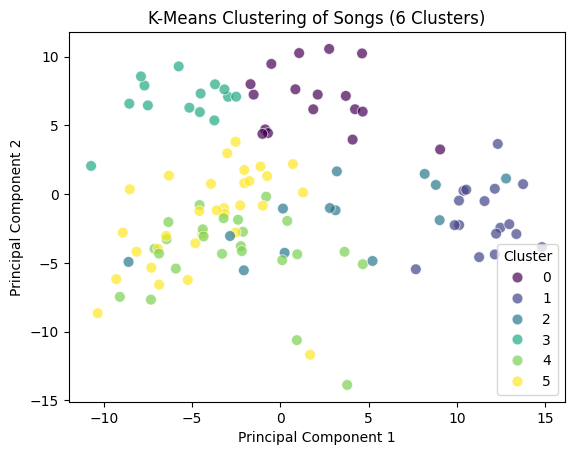

In [148]:
from sklearn.cluster import KMeans
import seaborn as sns

# Load the PCA-reduced data
pca_df = pd.read_csv("pca_song_features.csv")

# Drop the "Song" column if it exists, to use only the five principal components for clustering
if 'filename' in pca_df.columns:
    features = pca_df.drop(columns=['filename'])
else:
    features = pca_df

# Standardize the feature data for PCA
scaler = StandardScaler()
pca_df_scaled = scaler.fit_transform(features)

# Perform K-Means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df_scaled)

# Optional: Save the DataFrame with clusters for later use
pca_df.to_csv("pca_kmeans_clusters.csv", index=False)
print("Clustered data saved to 'pca_kmeans_clusters.csv'")

# Plot the clusters using the first two principal components
plt.figure()
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="viridis", s=60, alpha=0.7)
plt.title("K-Means Clustering of Songs (6 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.savefig('clusters.png')
plt.show()

In [149]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, pca_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(features, pca_df['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(features, pca_df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

Silhouette Score: 0.2198
Davies-Bouldin Index: 1.5017
Calinski-Harabasz Index: 31.6868


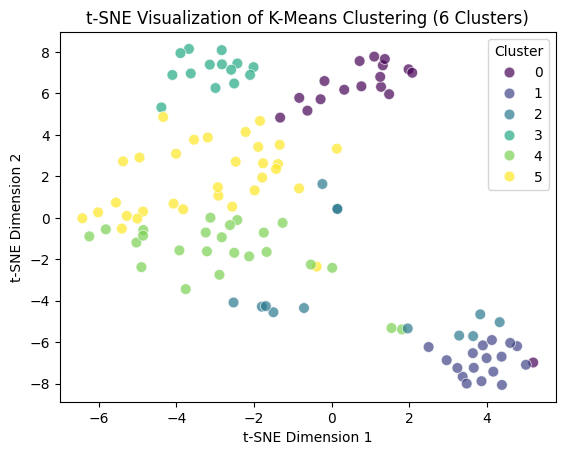

In [154]:
from sklearn.manifold import TSNE

# Drop non-numeric columns if necessary, like "Song" column
if 'filename' in pca_df.columns:
    features = pca_df.drop(columns=['filename', 'Cluster'])
else:
    features = pca_df.drop(columns=['Cluster'])

# Apply t-SNE to reduce data to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results to the DataFrame
pca_df['TSNE_1'] = tsne_results[:, 0]
pca_df['TSNE_2'] = tsne_results[:, 1]

# Plot t-SNE with clusters
plt.figure()
sns.scatterplot(x="TSNE_1", y="TSNE_2", hue="Cluster", data=pca_df, palette="viridis", s=60, alpha=0.7)
plt.title("t-SNE Visualization of K-Means Clustering (6 Clusters)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.savefig('tSNE_clusters.png')
plt.show()

detection_df = pd.read_csv("pca_kmeans_clusters.csv")

## Use Code from Here for getting the predicted labels from 116 mfcc files

In [48]:
song_pred = clf.predict(processed_data.drop('filename', axis=1))

In [49]:
song_pred

array([4, 4, 4, 4, 2, 1, 2, 4, 0, 2, 0, 4, 2, 2, 2, 4, 1, 4, 5, 2, 4, 2,
       0, 4, 1, 2, 2, 4, 2, 0, 4, 2, 4, 4, 2, 2, 4, 4, 1, 0, 2, 4, 2, 4,
       2, 2, 1, 4, 4, 4, 2, 5, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 1, 1, 4,
       0, 1, 2, 0, 4, 1, 4, 4, 4, 0, 2, 5, 4, 2, 4, 4, 0, 4, 4, 4, 2, 0,
       4, 4, 2, 4, 4, 4, 4, 0, 2, 5, 0, 2, 2, 4, 0, 5, 4, 2, 4, 4, 0, 2,
       2, 5, 0, 0, 2, 4])

In [53]:
predicted_song_categories = processed_data
predicted_song_categories['filename'] = processed_data['filename']
predicted_song_categories['labels'] = song_pred
predicted_song_categories

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels
0,-237.718662,82.459840,-506.49300,-45.292313,-220.985320,-1.138142,1.401354,-272.574340,-181.671720,6.184733e+08,...,-28.382177,40.087116,-1.963990,0.749194,0.489896,-7.576602,4.913619,1.115482e+06,01-MFCC,4
1,-235.843724,97.009359,-589.26610,-65.715126,-225.125600,-1.558575,3.166102,-273.326260,-168.190570,6.001903e+08,...,-34.989037,25.489983,-6.941352,0.005995,0.123293,-12.143410,-1.816992,9.970899e+05,02-MFCC,4
2,-150.180663,108.303370,-488.95325,60.603380,-131.700070,-0.709725,0.129020,-215.849500,-69.354600,8.388916e+08,...,-32.455780,38.406730,-1.624834,0.408024,1.141022,-6.163236,3.141897,1.368784e+06,03-MFCC,4
3,-250.229521,98.557778,-622.47220,-109.973145,-220.147060,-1.910500,3.954670,-277.970300,-186.713240,1.381546e+09,...,-43.084885,46.277252,0.081068,0.269329,0.366986,-7.074252,7.381023,2.666837e+06,04-MFCC,4
4,-254.277604,40.442019,-573.06030,-134.452790,-248.696010,-0.821419,1.113234,-276.551137,-225.740743,1.400499e+09,...,-33.584396,29.530388,-3.355791,0.054685,0.804589,-7.808926,1.317225,1.278317e+06,05-MFCC,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-177.540539,81.649206,-515.27640,-16.367943,-166.960420,-1.760391,4.908196,-209.673250,-127.836510,3.478475e+08,...,-43.832737,62.311220,-3.303369,1.078428,1.839864,-11.172388,4.635612,2.030668e+06,95-MFCC,5
112,-266.517896,46.779895,-549.72680,-124.483696,-260.446200,-0.930317,1.378238,-289.023930,-235.452680,2.001326e+09,...,-40.361916,27.944029,-6.798470,0.217414,0.991726,-11.085278,-2.244530,2.633503e+06,96-MFCC,0
113,-251.273887,37.473267,-587.11140,-138.190890,-249.865200,-0.539489,1.352850,-274.893740,-224.025830,1.560193e+09,...,-34.311638,31.622843,-7.873235,0.344889,1.078117,-11.953034,-3.613205,2.536324e+06,97-MFCC,0
114,-142.852312,70.560000,-521.47473,22.791946,-133.362755,-1.372578,3.896674,-171.894113,-99.204195,7.254667e+08,...,-21.677086,46.879550,7.884887,0.112538,0.400573,2.913684,12.884313,3.449443e+06,98-MFCC,2


In [68]:
# Dictionary to hold DataFrames for each label
label_dfs = {}

# Iterate over label mapping to create separate DataFrames for each label
for label_name, label_code in label_mapping.items():
    # print('label_name :', label_name)
    print('label_code :', type(label_code))
    # print("predicted_song_categories['labels']", type(predicted_song_categories['labels']))
    label_dfs[label_name] = predicted_song_categories[predicted_song_categories['labels'] == label_code].copy()
    #print(label_dfs)
# Now `label_dfs` contains DataFrames named by the label for each unique predicted label
# For example, you can access the DataFrame for 'asha_bhosle' with:
asha_bhosle_df = label_dfs['asha_bhosle']
kishore_kumar_df = label_dfs['kishore_kumar']
micheal_jackson_df = label_dfs['micheal_jackson']
bhavgeet_df = label_dfs['bhavgeet']

label_code : <class 'int'>
label_code : <class 'int'>
label_code : <class 'int'>
label_code : <class 'int'>
label_code : <class 'int'>
label_code : <class 'int'>


In [124]:
asha_bhosle_df.head()

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels
8,-262.479356,50.719877,-534.36523,-166.70871,-255.935855,-1.676559,4.226818,-280.173968,-228.632903,1.927490e+09,...,-38.186050,28.932138,-6.761633,0.351346,0.654805,-11.223434,-2.293300,2.431468e+06,09-MFCC,0
10,-273.787164,45.737206,-582.37890,-144.36943,-273.187625,-0.112229,0.194062,-304.647533,-243.023940,1.212942e+09,...,-29.632256,34.055190,-5.559157,0.578238,1.200855,-9.866803,-1.005654,1.197965e+06,100-MFCC,0
22,-288.897161,38.810133,-592.66260,-176.43504,-284.495500,-0.452779,0.251717,-314.073520,-261.228060,2.061404e+09,...,-37.078068,20.201862,-6.235271,0.111615,0.439528,-10.268524,-2.300473,1.867968e+06,111-MFCC,0
29,-179.817567,66.343827,-540.61444,21.28753,-167.723020,-2.233480,9.836572,-208.892470,-141.410320,1.212173e+09,...,-58.437485,54.630566,1.955466,0.250551,0.150438,-5.566032,11.949104,6.379830e+06,13-MFCC,0
39,-228.635669,62.814143,-516.17480,-65.70102,-224.434710,-1.245503,3.739981,-258.199282,-188.040048,1.822199e+09,...,-38.901380,43.333656,-2.428473,0.564599,0.986955,-7.668022,3.566923,3.138279e+06,23-MFCC,0


In [127]:
asha_bhosle_df_files = asha_bhosle_df['filename']
asha_bhosle_df_files.to_csv('asha_bhosle_files.csv', index=False)

In [128]:
kishore_kumar_df.head()

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels
4,-254.277604,40.442019,-573.06030,-134.452790,-248.69601,-0.821419,1.113234,-276.551137,-225.740743,1.400499e+09,...,-33.584396,29.530388,-3.355791,0.054685,0.804589,-7.808926,1.317225,1.278317e+06,05-MFCC,2
6,-274.451996,77.583432,-636.11365,-110.606510,-262.65470,-2.427316,9.039654,-299.362370,-233.024000,1.458400e+09,...,-36.472717,38.100883,-3.617777,0.387055,0.365989,-9.771181,2.252003,1.746051e+06,07-MFCC,2
9,-190.557425,52.642165,-516.13450,-72.483590,-181.23975,-2.108581,8.748347,-212.164780,-156.769333,1.163354e+09,...,-44.849483,54.182938,4.428216,0.161292,0.712438,-2.119725,12.006447,4.700667e+06,10-MFCC,2
12,-299.242821,46.815336,-600.76610,-181.936580,-293.23563,-1.470484,4.708724,-319.681760,-269.738430,1.715958e+09,...,-55.116547,52.344048,-4.917509,0.424478,0.792206,-12.186532,3.802768,4.016906e+06,102-MFCC,2
13,-192.368253,113.377257,-496.76602,29.350542,-166.67416,-0.884976,0.198849,-243.645630,-114.637290,1.696485e+09,...,-39.330284,45.752323,-1.678165,1.041052,2.760931,-6.353194,3.369216,2.596428e+06,103-MFCC,2


In [130]:
kishore_kumar_df_files = kishore_kumar_df['filename']
kishore_kumar_df_files.to_csv('kishore_kumar_files.csv', index=False)

In [132]:
micheal_jackson_df.head()

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels
0,-237.718662,82.459840,-506.49300,-45.292313,-220.98532,-1.138142,1.401354,-272.574340,-181.671720,6.184733e+08,...,-28.382177,40.087116,-1.963990,0.749194,0.489896,-7.576602,4.913619,1.115482e+06,01-MFCC,4
1,-235.843724,97.009359,-589.26610,-65.715126,-225.12560,-1.558575,3.166102,-273.326260,-168.190570,6.001903e+08,...,-34.989037,25.489983,-6.941352,0.005995,0.123293,-12.143410,-1.816992,9.970899e+05,02-MFCC,4
2,-150.180663,108.303370,-488.95325,60.603380,-131.70007,-0.709725,0.129020,-215.849500,-69.354600,8.388916e+08,...,-32.455780,38.406730,-1.624834,0.408024,1.141022,-6.163236,3.141897,1.368784e+06,03-MFCC,4
3,-250.229521,98.557778,-622.47220,-109.973145,-220.14706,-1.910500,3.954670,-277.970300,-186.713240,1.381546e+09,...,-43.084885,46.277252,0.081068,0.269329,0.366986,-7.074252,7.381023,2.666837e+06,04-MFCC,4
7,-144.206377,104.477332,-531.29550,27.711243,-121.89611,-1.709258,3.508269,-177.563838,-81.946612,7.100091e+08,...,-32.328743,38.164017,-0.624718,0.214921,0.250035,-5.966485,4.673359,1.454158e+06,08-MFCC,4


In [134]:
micheal_jackson_df_files = micheal_jackson_df['filename']
micheal_jackson_df_files.to_csv('micheal_jackson_files.csv', index=False)

In [73]:
bhavgeet_df

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels
5,-186.385409,71.225814,-538.55945,-14.797104,-177.245480,-1.499779,4.951027,-219.796240,-140.478195,1.260747e+09,...,-38.623283,47.734990,-0.743515,0.532634,0.341193,-7.554314,7.097820,4.090040e+06,06-MFCC,1
16,-224.385946,64.354220,-542.77374,-54.070000,-216.304480,-1.369521,4.795780,-258.677830,-183.827920,1.305266e+09,...,-38.217316,45.079258,0.185360,0.474744,0.257113,-5.610697,7.849386,2.645738e+06,106-MFCC,1
24,-167.876621,77.529115,-553.72406,-12.030768,-155.337170,-2.391914,9.089205,-197.299260,-121.588180,9.659272e+08,...,-42.678127,59.263298,-1.201783,0.393555,1.077509,-7.224482,4.927084,2.720377e+06,113-MFCC,1
38,-213.545962,85.754582,-596.52985,-29.390701,-201.563130,-2.043839,6.978650,-250.991180,-159.032940,1.002611e+09,...,-47.240196,52.746082,-4.161994,0.616360,1.590985,-10.025792,1.727045,2.303872e+06,22-MFCC,1
46,-237.308132,73.003139,-546.27997,-42.929810,-227.492805,-1.392361,4.089527,-270.876577,-192.165905,1.481443e+09,...,-45.934090,36.454807,-7.935629,0.405923,0.824714,-13.989851,-1.512654,3.731635e+06,30-MFCC,1
63,-167.512504,64.787414,-506.93927,-12.633374,-166.176490,-0.771199,2.115944,-205.236680,-123.191047,8.022527e+08,...,-45.423496,45.470040,8.181999,-0.194213,0.045739,0.187188,16.150026,4.935078e+06,47-MFCC,1
64,-222.291084,65.162612,-587.82477,-64.555336,-212.876400,-2.502401,11.864173,-254.126160,-183.783580,1.496724e+09,...,-48.221380,40.745810,-3.299528,0.044544,0.556440,-9.778313,2.634693,2.804738e+06,48-MFCC,1
67,-225.408043,29.253298,-566.28060,-166.837230,-219.494585,-1.476728,4.035904,-239.005803,-205.614705,8.895601e+08,...,-26.478928,17.268528,-3.996830,-0.045914,-0.004241,-7.705928,-0.416565,7.759483e+05,51-MFCC,1
71,-211.248840,73.629068,-557.91580,-25.357462,-204.520500,-2.018252,7.267626,-238.664150,-171.852400,1.085076e+09,...,-42.051716,44.630516,-9.296778,0.776523,3.377766,-14.061104,-4.353869,3.119852e+06,55-MFCC,1


In [135]:
bhavgeet_df_files = bhavgeet_df['filename']
bhavgeet_df_files.to_csv('bhavgeet_files.csv', index=False)

In [74]:
lavani_df = label_dfs['lavani']
lavani_df

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels


In [77]:
national_anthem_df = label_dfs['national_anthem']
national_anthem_df

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy,filename,labels
18,-195.497356,70.270712,-475.84396,-36.076427,-188.88515,-1.808123,5.092759,-220.59302,-152.395720,3.957083e+08,...,-39.121834,35.034637,-4.482587,0.149934,-0.303239,-12.115669,3.064337,1.226363e+06,108-MFCC,5
51,-210.638356,79.328518,-564.37970,-17.325400,-191.34741,-2.315156,7.001599,-235.08870,-165.891430,4.661367e+08,...,-56.844270,42.701810,-0.343517,0.092693,0.322323,-7.692542,7.466105,1.405803e+06,35-MFCC,5
77,-202.500522,65.934790,-463.54690,-63.136944,-195.15146,-1.782396,4.790495,-223.33432,-164.398210,4.158495e+08,...,-26.819890,28.243374,0.381221,0.124270,0.325557,-3.686051,5.035402,4.483667e+05,61-MFCC,5
97,-161.640804,72.185132,-502.69714,-27.229677,-150.64406,-2.407057,8.244830,-180.03390,-118.740746,2.864647e+08,...,-25.801186,37.899467,2.577703,0.205029,0.387408,-2.286290,7.523167,6.196479e+05,81-MFCC,5
103,-215.178315,97.282968,-593.68097,-62.568650,-195.01701,-1.844272,4.348231,-252.72792,-150.024220,5.079696e+08,...,-34.064407,33.538850,-0.710008,0.156503,0.235752,-5.939308,4.636297,6.300863e+05,87-MFCC,5
111,-177.540539,81.649206,-515.27640,-16.367943,-166.96042,-1.760391,4.908196,-209.67325,-127.836510,3.478475e+08,...,-43.832737,62.311220,-3.303369,1.078428,1.839864,-11.172388,4.635612,2.030668e+06,95-MFCC,5


In [136]:
national_anthem_df_files = national_anthem_df['filename']
national_anthem_df_files.to_csv('national_anthem.csv', index=False)

In [79]:
ext_data = extract_row_features_from_csv('lavani_ext.csv', 'lavani_ext')

In [80]:
ext_data

,MFCC_1_Mean,MFCC_1_Std,MFCC_1_Min,MFCC_1_Max,MFCC_1_Median,MFCC_1_Skew,MFCC_1_Kurtosis,MFCC_1_25th_Percentile,MFCC_1_75th_Percentile,MFCC_1_Energy,...,MFCC_20_Mean,MFCC_20_Std,MFCC_20_Min,MFCC_20_Max,MFCC_20_Median,MFCC_20_Skew,MFCC_20_Kurtosis,MFCC_20_25th_Percentile,MFCC_20_75th_Percentile,MFCC_20_Energy
lavani_ext,-180.706722,97.841272,-479.72165,-0.757185,-157.49182,-0.789128,0.036324,-242.62486,-107.970665,1.242470e+09,...,-3.693533,9.919602,-53.769707,43.259354,-4.252208,0.377178,1.031438,-10.093284,1.873202,3.296573e+06


In [81]:
lavani_pred = clf.predict(ext_data)

In [82]:
lavani_pred

array([4])